## Métodos de Diferenciación numérica
### Noel Alejandro Contreras Acosta

### 1. Diferenciación numérica (valor 2 puntos).
### Crea una función f(x) que devuelva 1 + 1/2tanh(2x), luego usa diferencias centrales para calcular numericamente la derivada de la función en el intervalo −2 ≤ x ≤ 2. Después, calcula la derivada analíticamente y haz una gráfica con tu resultado numérico y la respuesta analítica en el mismo grafico. Puede resultar útil graficar la respuesta exacta como líneas y la numerica como puntos. (Hint: usa la función tanh del paquete math.)

In [25]:
from math import tanh, cosh 
import numpy as np
import matplotlib.pyplot as plt
import math as mt

In [27]:
def t(x): #Creamos la fucnión que se nos pide.
    return 1 + (1/2)*tanh(2*x)

In [29]:
def difcen(f,x,h): #creamos la función que aproxima a la derivada por diferencias centrales. Tiene como argumentos a la función f, la variable x y h.
    aprox= (f(x+h/2)-f(x-h/2))/h 
    return aprox #regresa la derivada por diferencias centrales
    
    

#### Recordemos que la función orginal es
$$
f(x)=1+\frac{1}{2}tanh(2x)
$$
#### Derivando respecto a x tendremos:
$$
\frac{df(x)}{dx}=  \frac{1}{2}sech^2(2x)\frac{d(2x)}{dx}
$$
#### Obteniendo así, de forma analítica, que la derivada es:
$$
\frac{df}{dx}= sech^2(2x)= \frac{1}{cosh^2(2x)}
$$

In [32]:
valx=np.linspace(-2,2,100) #generamos los puntos en los que se evaluaran las funciones 
valdif=[] #creamos dos listas vacías, una para los valores de la diferencia central y otros para los de la derivada analítica
valan=[]
h=0.001 #seleccionamos un valor ppequeño para h
for i in valx: #ciclo for para los valores en valx. Cada i en valx será el argumento tanto 
    n=difcen(t,i,h)
    valdif.append(n) #se agrega cada evaluación de la función difcen en la lista valdif
    valan.append(1/(cosh(2*i))**2) #cada evaluación de la derivada analítica se va agregando a la lista valan

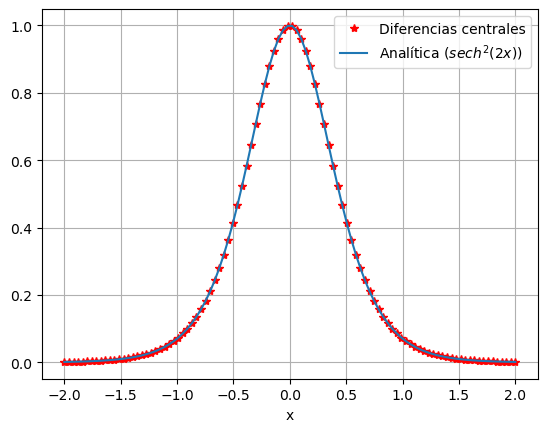

In [34]:
plt.plot(valx, valdif, 'r*', label='Diferencias centrales') #graficamos los puntos obtenidos por diferencias centrales
plt.plot(valx, valan, label='Analítica ($sech^2(2x)$)') #graficamos los puntos obtenidos por la derivada analítica
plt.xlabel('x')
plt.legend() #Para que las etiqeutas aparezcan
plt.grid() #Para que aparezca la cuadrícula

### 2. Campo eléctrico de una distribución de cargas (valor 4 puntos).
### Supongamos que tenemos una distribución de cargas y queremos calcular el campo eléctrico resultante. Una forma de hacerlo es calcular primero el potencial eléctrico φ y luego tomar su gradiente. Para una carga puntual q en el origen, el potencial eléctrico a una distancia r del origen es φ = q/4πε0r y el campo electrico es E = −∇φ.
### (a) Suponiendo que tienes dos cargas, de +1 C y −1 C (respectivamente), separadas 10 cm. Calcula el potencial electrico resultante en un plano cuadrado de 1m × 1m que rodea las cargas y pasa a través de ellas. Calcula el potencial en puntos espaciados a 1 cm en una cuadrícula y haz una visualizacion en la pantalla del potencial usando un gráfico de densidad.

#### El potencial total es la suma de los potenciales de cada carga, por lo que se expresa de la siguiente forma:
$$
V= \frac{q}{4\pi \epsilon_o \| (x,y)-(-0.05,0) \|} + \frac{-q}{4\pi \epsilon_o \| (x,y)-(0.05,0) \|}
$$
#### Que desarrollando la expresión de norma, queda así:
$$
V= \frac{q}{4\pi \epsilon_o \sqrt{(x+0.05)^2+y^2}} + \frac{-q}{4\pi \epsilon_o \sqrt{(x-0.05)^2+y^2}}
$$
#### Donde se tomó en consideración que la escala es en metros y que ambas cargas están sobre el eje X, la carga positiva en el punto (-0.05,0) y la negativa en el (0.05,0), teniendo así 10 cm de distancia entre ellas. 

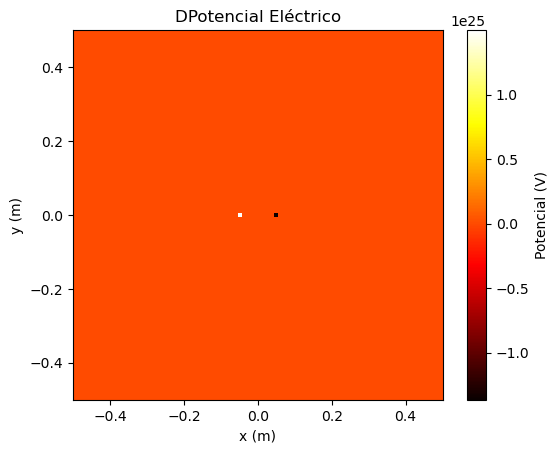

In [53]:
epsilon= 8.854e-12 #F/m   Definimos la permitividad del vacío

def pot(q,r): #definimos la función potencial
    v=q/(4*np.pi*epsilon*r) #definimos la fórmula del potencial
    return np.where(r==0,0,v) #Para evitar division entre cero en la fórmula del potencial, la función nos regresa 0 ucando r=0, y pars cualquier 
                            #sí nos regresa la fórmula del potencial evaluada en r
   

    
x=np.arange(-0.5,0.51, 0.01) #generamos dos array's, uno para x y otro para y en un rango de 1 metro con saltos cada 1 cm.
y=np.arange(-0.5,0.51, 0.01)
X, Y =np.meshgrid(x,y) #generamos una matriz de puntos en el plano donde se irá evaluando el potencial
r1= ((X+0.05)**2 + Y**2)**(1/2) #Esta es la distancia de la carga positiva al punto (X,Y) donde quiere calcularse el potencial
r2=((X-0.05)**2+Y**2)**(1/2) #Esta es la distancia de la carga negativa al punto (X,Y) donde quiere calcularse el potencial}


V1=pot(1,r1) #Generamos un arreglo de potenciales evaluando la función pot en la carga  positiva de 1C y en los r adecuados, que para este caso son r1
V2=pot(-1,r2) #Generamos un arreglo de potenciales evaluando la función pot en la carga  negativa de -1C y en los r adecuados, que para este caso son r2
V= V1+V2 #Definimos el potencial total como la suma de los dos potenciales anteriores


plt.imshow(V, extent=[-0.5, 0.5, -0.5, 0.5], cmap="hot", origin="lower") #generamos la gráfica del potencial. Cada eje coordenado va de -0.5 a 0.5 metros
                                                                         #teniendo de esta forma la placa de 1m x 1m.
plt.title("DPotencial Eléctrico") #ponemos título a la imagen
plt.xlabel("x (m)") #ponemos eriquetas a los ejes coordenados
plt.ylabel("y (m)")
plt.colorbar(label="Potencial (V)") #Ponemos título a la barra de color





### (b) Ahora calcula las derivadas parciales del potencial con respecto a x y y, para encontrar el campo eléctrico en el plano xy y realiza una visualización de dicho campo.
### Lo anterior es un poco más complicado que visualizar el potencial, porque el campo eléctrico tiene magnitud y dirección. Una forma de hacer podría ser hacer dos gráficos de densidad, uno para la magnitud y otro para la dirección, este último usando el esquema de color “hsv” en pylab, que es un esquema de arco ́ıris que pasa por todos los colores pero comienza y termina con el mismo tono de rojo, lo que lo hace adecuado para representar cosas como direcciones o ángulos que dan la vuelta al círculo completo y terminan donde comenzaron. Una visualización más sofisticada podría usar el objeto de flecha del paquete visual, dibujando una cuadrícula de flechas con la direccion y la longitud elegidas para representar el campo.

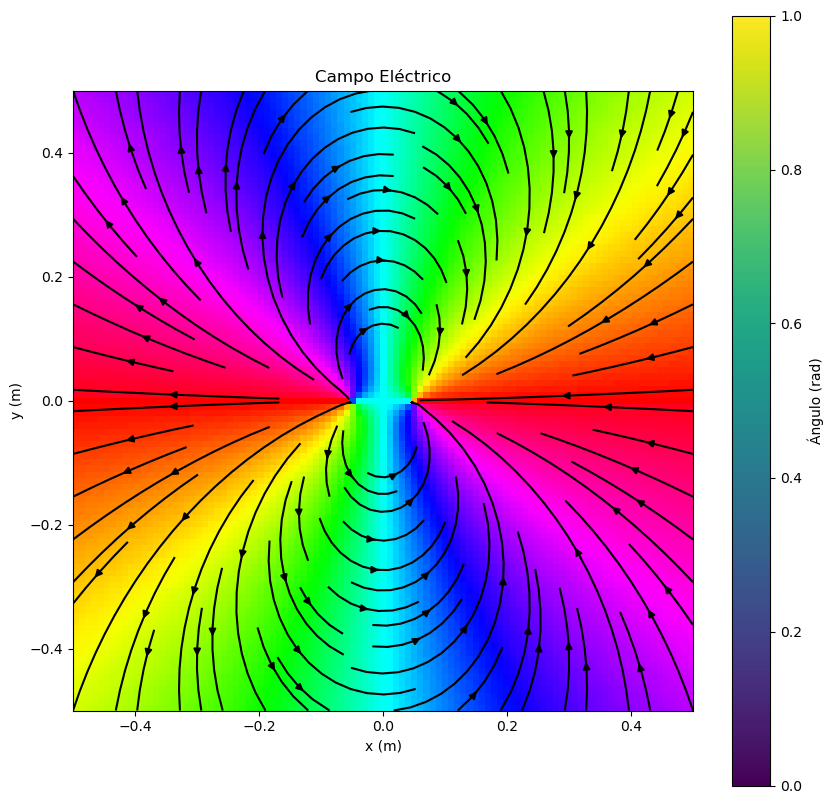

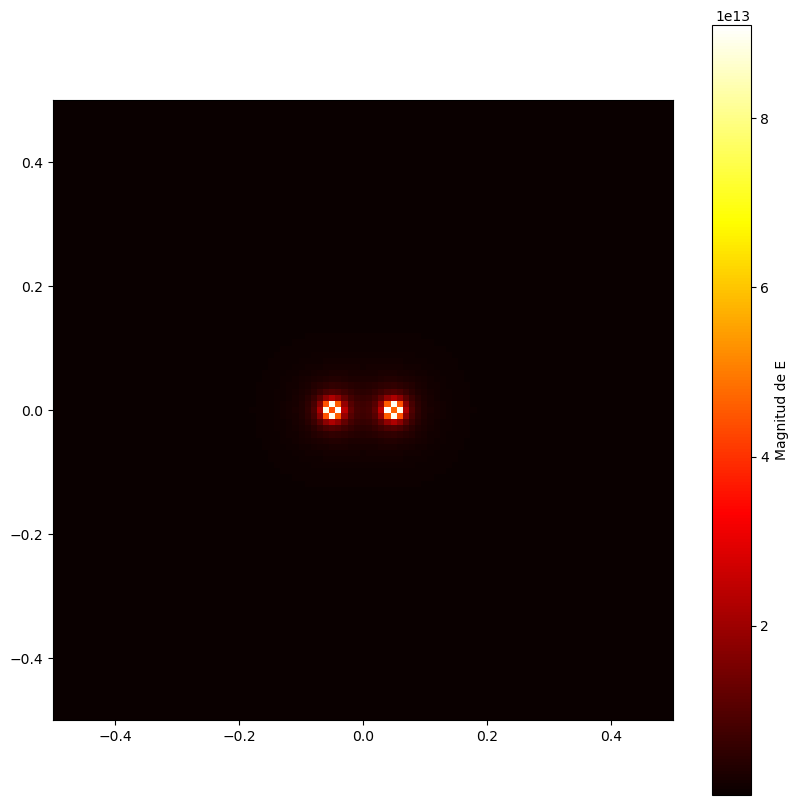

In [40]:
def Pot(x,y): #Definimos la función que nos dará el potencial  total
    r1=((x+0.05)**2 + y**2)**(1/2) #definimos la distancia de la carga positiva a cualquier punto (x,y)
    r2=((x-0.05)**2 + y**2)**(1/2) #definimos la distancia de la carga negativa a cualquier punto (x,y)
    v1=1/(4*np.pi*epsilon*r1) #definimos el potencial generado por la carga positiva
    v2=1/(4*np.pi*epsilon*r2) #definimos el potencial generado por la carga engativa
    v=v1-v2 #definimos el potencial total
    return v #nos regresa el potebcial total

def parcialx(f,x0,y0,h): #generamos la función que nos da la parcial respecto a x
    dfx=(f(x0+h/2,y0)-f(x0-h/2,y0))/h
    return dfx
    
def parcialy(f,x0,y0,h,): #generamos la función que nos da la parcial respecto a y
    dfy=(f(x0,y0+h/2)-f(x0,y0-h/2))/h
    return dfy

x=np.arange(-0.5,0.51, 0.01) #generamos dos array's, uno para x y otro para y en un rango de 1 metro con saltos cada 1 cm.
y=np.arange(-0.5,0.51, 0.01)
X, Y =np.meshgrid(x,y) #generamos una malla de puntos en el plano donde se irá evaluando el campo eléctrico

h=1e-6 #definimos el valor de la ha que vamos a usar
Ex=-parcialx(Pot,X,Y,h) #La componente x del campo eléctrico
Ey=-parcialy(Pot,X,Y,h) #La compponente y del campo eléctrico
magnitud= (Ex**2+Ey**2)**0.5 #Generamos la magnitud del campo eléctrico

direccion=np.arctan2(Ey,Ex) #la dirección la da el ángulo entre las componentes del campo eléctrico
direccion_norm = (direccion + np.pi) / (2 * np.pi) #Normalizamos la dirección pues hsv tiene un rango 0 a 1


plt.figure(figsize=(10, 10)) #le damos tamaño a la gráfica
plt.imshow(direccion_norm, extent=[-0.5, 0.5, -0.5, 0.5], cmap="hsv", origin='lower', vmin=0, vmax=1) #se genera un gráfico de densidad de la dirección del campo
plt.streamplot(X, Y, Ex,Ey, color="black") #graficamos las líneas del campo eléctrico, 
plt.colorbar(label="Ángulo (rad)") #nombre de la barra
plt.title("Campo Eléctrico") #nombre del gráfico
plt.xlabel("x (m)") #el eje x se mide en metros
plt.ylabel("y (m)") #el eje y se mide en metros
plt.show()


#Aquí generamos la segunda gráfica de densidad, peor en este caso de magnitud
plt.figure(figsize=(10,10))
plt.imshow(magnitud, extent=[-0.5, 0.5, -0.5, 0.5], cmap="hot", origin='lower')
plt.colorbar(label="Magnitud de E")
plt.show()


### (c) Ahora supongamos que tenemos una distribución continua de carga sobre un cuadrado de L × L. La densidad de carga en C/m2 es:
$$\sigma(x, y) = q_0 sen (\frac{2\pi x}{L})sen(\frac{2\pi y}{L})
$$

### Calcula y visualiza el campo eléctrico resultante en puntos espaciados a 1 cm en 1 metro cuadrado del plano xy para el caso donde L = 10 cm. La distribución de carga esta centrada en el medio del área visualizada y q0 = 100 C/m2
### Tendrás que realizar una integral doble sobre x y y, luego diferenciar el potencial respecto a la posición para obtener el campo eléctrico. Elige cualquier método de integración que parezca apropiado para las integrales.

#### Para calcular el campo eléctrico lo haremos a través del potencial. Calcularemos una doble integral en x e y, con límites de integración de -0.05 a 0.05 (metros) en ambos ejes, teniendo lo siguiente :
$$
V= \frac{1}{4\pi\epsilon_o}\int_{-0.05}^{0.05}\int_{-0.05}^{0.05}\frac{\sigma(x,y)}{r} dxdy
$$
#### Y sustituyendo la expresión de la densidad superficial de carga, se tiene:
$$
V= \frac{1}{4\pi\epsilon_o}\int_{-0.05}^{0.05}\int_{-0.05}^{0.05}\frac{q_0 sen (\frac{2\pi x}{L})sen(\frac{2\pi y}{L})}{r} dxdy
$$
#### La expresión anterior es la qiue debemos calcular. Para ello usaremos la cuadratura de Gauss. 
#### Una vez hecho lo anterior, procederemos a calcular el campo E usando que:
$$
E=-\nabla V
$$


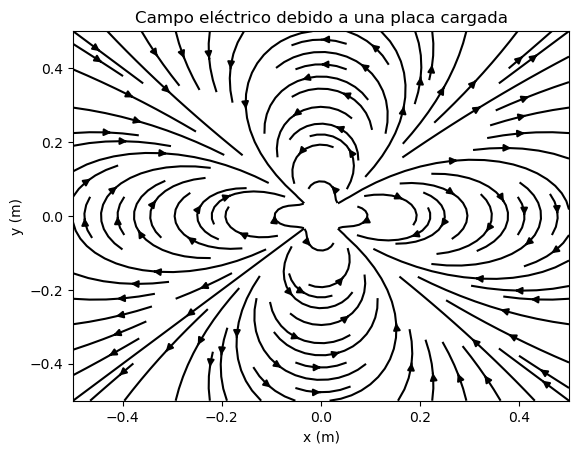

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import roots_legendre
from scipy.special import legendre


def sigma(x,y,x0,y0): #pese al nombre, esta  es la función que se integrará, i.e. la función de densidad superficial de carga entre r
    L=0.1 #cm
    q0=100 #C/m^2
    sigmav=q0*(np.sin(2*np.pi*x/L)*np.sin(2*np.pi*y/L)) #definios la densidad de carga superifical de carga para este caso
    r=np.sqrt((x-x0)**2+(y-y0)**2)
    inte=sigmav/r
    return inte #nos regresa el integrando que se usará en la cuadratura de gauss

def doble_cuadgauss(f, N, a, b, x0, y0):
    raices, pesos = roots_legendre(N)  # Raíces y pesos de Gauss-Legendre
    raices1 = [(1/2)*(b-a)*i + (1/2)*(b+a) for i in raices] #agregamos las raices reescalados a la lista pesos1
    pesos1 = [(1/2)*(b - a)*i for i in pesos] #agregamos los pesos reescalados a la lista pesos1
    
    I = 0 #le damos el valor inicial de 0 a la integral
    for i in range(len(raices1)):
        for j in range(len(raices1)):
            I += f(raices1[i], raices1[j], x0, y0)*pesos1[i]*pesos1[j] #se calcula l doble integral haciendo la doble suma, la que corresponde a
                                                                       #la variable x y a la variable y
    return I #nos regresa la integral aproximada por cuadratura de gauss


def potencial(x0,y0): #definimos la fucnión que nos drá el potencial generado por la placa cargada
    epsilon= 8.854e-12 #F/m  la permitividad del vacío
    k=1/(4*np.pi*epsilon)
    return k*doble_cuadgauss(sigma,20,-0.05, 0.05,x0,y0) #nos regresa el potencial en forma de la doble integral que señalamos en la celda de arriba


def parcialx(f,x0,y0,h): #generamos la función que nos da la parcial respecto a x en el punto (x0,y0)
    dfx=(f(x0+ h/2,y0)-f(x0-h/2,y0))/h
    return dfx
    
def parcialy(f,x0,y0,h,): #generamos la función que nos da la parcial respecto a y en el punto (x0,y0)
    dfy=(f(x0,y0+ h/2)-f(x0,y0-h/2))/h
    return dfy


x=np.arange(-0.5,0.51, 0.01) #generamos dos array's, uno para x y otro para y en un rango de 1 metro con saltos cada 1 cm.
y=np.arange(-0.5,0.51, 0.01)
X, Y =np.meshgrid(x,y) #generamos una malla de puntos en el plano donde se irá evaluando el campo eléctrico

h=1e-6 #definimos el valor de la ha que vamos a usar

Ex = -parcialx(potencial, X, Y, h) # Calculamos las componentes del campo eléctrico
Ey = -parcialy(potencial, X, Y, h)
            
# Graficamos el campo eléctrico con streamplot
plt.streamplot(X, Y, Ex, Ey, color="black")
plt.title("Campo eléctrico debido a una placa cargada")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.show()
        
            
    

### 3. Procesamiento de imágenes y STM (valor 4 puntos).
### Cuando la luz incide sobre una superficie, la cantidad que cae por unidad de área depende no solo de la intensidad de la luz, sino también del ángulo de incidencia. Si la luz forma un angulo θ con la normal, solo “ve” una fracción cosθ de area, por unidad de área real en la superficie.
### Así, la intensidad de la iluminación es acos θ, si a es la intensidad bruta de la luz. Esta simple ley física es un elemento central de los gráficos por computadora en 3D. Nos permite calcular como incide la luz sobre objetos tridimensionales y, por tanto, cómo se verán cuando se iluminen desde varios ángulos. 
### Supongamos, por ejemplo, que miramos la Tierra desde arriba y vemos sus montañas. Conocemos la altura de las montañas w(x, y) en funcion de la posición en el plano, por lo que la ecuacion para la superficie de la Tierra es simplemente z = w(x, y), o equivalentemente w(x, y) − z = 0, y el vector normal ⃗v a la superficie está dado por el gradiente de w(x, y) − z de la siguiente manera:
$$
\vec{v}= \nabla[w(x,y)-z] = \begin{pmatrix} \partial/\partial x \\ \partial/\partial y \\ \partial/\partial z \end{pmatrix}[w(x,y)-z]= \begin{pmatrix} \partial w/\partial x \\ \partial w/\partial y \\ -1\end{pmatrix}
$$
### Ahora supongamos que tenemos luz entrante representada por un vector ⃗a con magnitud igual a la intensidad de la luz. Entonces el producto escalar de los vectores⃗ a y ⃗v es:
$$
\vec{a}\cdot\vec{v} = \lvert \vec{a} \rvert \lvert \vec{v} \rvert cos\theta
$$
### donde θ es el ángulo entre los vectores.
### Entonces, la intensidad de la iluminación de la superficie de las montañas es:
$$
I= \lvert \vec{a}\rvert cos\theta = \frac{\vec{a}\cdot\vec{v} }{\lvert \vec{v} \rvert } = \frac{a_x(\partial w/\partial x) + a_y(\partial w/\partial y ) - a_z}{\sqrt{(\partial w/\partial x)^2 + (\partial w/\partial y)^2+1}}
$$
### Tomemos un caso simple donde la luz brilla horizontalmente con intensidad unitaria, a lo largo de una línea en un angulo φ en sentido contrario a las manecillas del reloj desde el eje este-oeste, de modo que  a= (cos φ, sin φ, 0). Entonces nuestra intensidad de iluminación se simplifica a:
$$
I= \frac{cos\phi(\partial w/\partial x) + sen\phi (\partial w/\partial y )}{\sqrt{(\partial w/\partial x)^2 + (\partial w/\partial y)^2+1}}
$$
### Así, sí podemos calcular las derivadas de la altura w(x, y) y sabemos φ, entonces podemos calcular la intensidad en cualquier punto.
### (a) El archivo adjunto altitudes.txt, contiene la altitud w(x, y) en metros sobre el nivel del mar (o profundidad bajo el nivel del mar) de la superficie de la Tierra, medida en una cuadrícula de puntos (x, y). Escribe un programa que lea este archivo y almacene los datos en una matriz. Luego calcula las derivadas ∂w/∂x y ∂w/∂y en cada punto de la cuadrícula. Explica que método utilizaste para calcularlos y por qué. (Hint: probablemente tendrás que usar más de un método para obtener cada punto de la cuadrícula porque suceden cosas incomodas en los bordes de la misma). Para calcular las derivadas, necesitaras saber el valor de h y la distancia en metros entre puntos de la cuadríula, que es de aproximadamente 30, 000 m en este caso.

In [46]:
altitudes=np.loadtxt("altitudes.txt") #Almacena los datos en una matriz
h=30000 #es la distancia entre putos de la cuadricula
W_x=np.zeros_like(altitudes) #generamos un arreglo cpara almacenar las derivada en x
W_y=np.zeros_like(altitudes) #generamos un arreglo para almacenar las derivadas en y

filas, columnas = W_x.shape

for i in range(columnas):
    for j in range(filas):
        if i==0:
            W_x[j,i]=(altitudes[j,i+1]-altitudes[j,i])/h   #para el borde izquierdo usamos diferencias hacia adelante

        elif i==2*len(W_x)-1:
             W_x[j,i]=(altitudes[j,i]-altitudes[j,i-1])/h   #para el borde derecho, usamos diferencias hacia atrás
        else:
             W_x[j,i]=(altitudes[j,i+1]-altitudes[j,i-1])/(2*h) #para el centro usamos diferencias centrales
        if j==0:
             W_y[j,i]=(altitudes[j+1,i]-altitudes[j,i])/h #para el borde inferior, usamos diferencias hacia adelante

        elif j==len(W_y)-1:     
             W_y[j,i]=(altitudes[j,i]-altitudes[j-1,i])/h   #para el borde superior, usamos diferencias hacia atrás
        else:
            W_y[j,i]=(altitudes[j+1,i]-altitudes[j-1,i])/(2*h)  #En el centro, usamos diferencias centrales

print(W_x)
print("\n","\n")
print(W_y)


[[ 4.26666667e-05  3.65000000e-05  2.91666667e-05 ...  9.03333333e-05
   8.10000000e-05  7.56666667e-05]
 [ 3.37666667e-04  3.26833333e-04  3.04333333e-04 ...  4.61000000e-04
   4.44500000e-04  4.35666667e-04]
 [ 1.63333333e-04  6.65000000e-05 -7.51666667e-05 ...  9.66500000e-04
   8.85166667e-04  8.15333333e-04]
 ...
 [-5.33333333e-05 -5.48333333e-05 -5.55000000e-05 ... -5.00000000e-05
  -5.35000000e-05 -5.73333333e-05]
 [-3.10000000e-05 -3.03333333e-05 -3.25000000e-05 ... -3.28333333e-05
  -3.38333333e-05 -3.43333333e-05]
 [-3.00000000e-06 -2.83333333e-06 -2.16666667e-06 ... -1.66666667e-06
  -3.00000000e-06 -4.33333333e-06]]

 

[[ 0.004891    0.005186    0.00547167 ...  0.00385367  0.00422067
   0.00458067]
 [ 0.02438683  0.02444717  0.02441683 ...  0.02337717  0.0238115
   0.02418133]
 [ 0.03476033  0.03422017  0.033555   ...  0.03458617  0.03478583
   0.03493867]
 ...
 [-0.00280683 -0.00280083 -0.00279533 ... -0.00281483 -0.00281233
  -0.00281033]
 [-0.00326417 -0.003239   -0.003

### (b) Ahora, usando tus valores para las derivadas, calcula la intensidad para cada punto de la cuadrícula, con φ = 45◦, y haz un grafico de densidad de los valores resultantes en el que el brillo de cada punto depende de la correspondiente valor de intensidad. Si lo haces funcionar correctamente, la grafica debería verse como un mapa en relieve del mundo; deberías poder ver los continentes y las cadenas montañosas en 3D. (Algunos de los problemas comunes al hacer esto, pueden ser: un mapa que esta al revés o de lado, o un mapa en el que el relieve que está “de adentro hacia afuera”, lo que significa que las regiones altas se ven bajas y viceversa. Trabaja con los detalles de tu programa hasta que obtiengas un mapa que te parezca adecuado.) Hint: Ten en cuenta que el valor de la intensidad I de la formula anterior puede ser positivo o negativo; oscila entre +1 y −1. ¿Qué significa una intensidad negativa? Significa que el área en cuestión está en sombras (es decir, que se encuentra en el lado equivocado de la montaña para recibir alguna luz). Podrías representar esto coloreando esas areas del mapa completamente de negro, aunque en la practica obtendrás una imagen más bonita (aunque tal vez menos realista) simplemente usando una gama continua de grises desde +1 hasta −1.



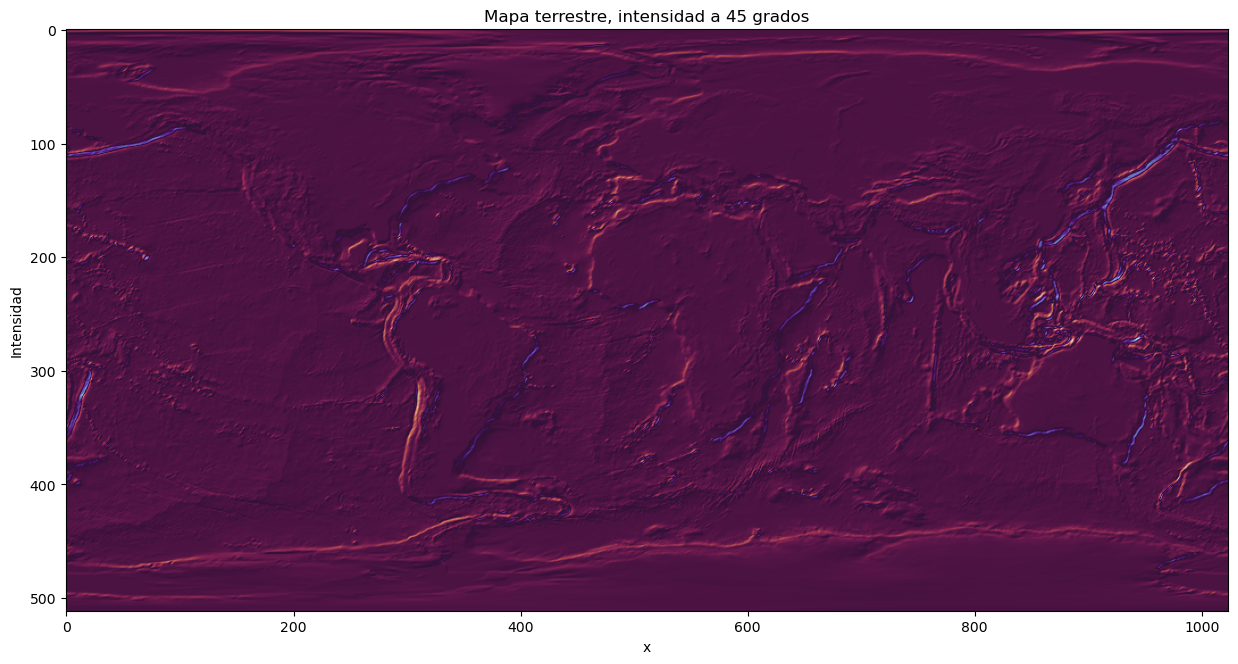

In [48]:
Intensidad=np.zeros_like(W_x)

for i in range(2*len(W_y)):
    for j in range(len(W_x)):
        Intensidad[j,i]=((np.cos(np.radians(45)) * W_x[j, i]) + (np.sin(np.radians(45)) * W_y[j, i])) / (np.sqrt(W_x[j,i]** 2 + W_y[j, i]**2 + 1))

#print(Intensidad)
plt.figure(figsize=(15, 10))

plt.imshow(Intensidad,cmap="twilight")
plt.title("Mapa terrestre, intensidad a 45 grados")
plt.xlabel("x")
plt.ylabel("Intensidad")

plt.show()